In [10]:
path = "/Users/tlee010/desktop/data-science-datasets/warcraft-avatar-history/wowah_data.csv"
path2 = "/Users/tlee010/desktop/data-science-datasets/warcraft-avatar-history/locations.csv"
path3 = "/Users/tlee010/desktop/data-science-datasets/warcraft-avatar-history/location_coords.csv"
path4 = "/Users/tlee010/desktop/data-science-datasets/warcraft-avatar-history/zones.csv"

import pandas as pd
import numpy as np

In [49]:
wow = pd.read_csv(path)


In [157]:
wow.head()
wow.year.unique()

array(['2008'], dtype=object)

In [12]:
locations = pd.read_csv(path2)

In [13]:
lc = pd.read_csv(path3)

In [15]:
zones = pd.read_csv(path4)

In [47]:
print wow.info()
wow.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10826734 entries, 0 to 10826733
Data columns (total 7 columns):
char          int64
 level        int64
 race         object
 charclass    object
 zone         object
 guild        int64
 timestamp    object
dtypes: int64(3), object(4)
memory usage: 578.2+ MB
None


,char,level,race,charclass,zone,guild,timestamp
0,59425,1,Orc,Rogue,Orgrimmar,165,01/01/08 00:02:04
1,65494,9,Orc,Hunter,Durotar,-1,01/01/08 00:02:04
2,65325,14,Orc,Warrior,Ghostlands,-1,01/01/08 00:02:04
3,65490,18,Orc,Hunter,Ghostlands,-1,01/01/08 00:02:04
4,2288,60,Orc,Hunter,Hellfire Peninsula,-1,01/01/08 00:02:09


In [81]:
# wow['month'] = wow[' timestamp'].map(lambda x : x[0:2])
# wow['day'] = wow[' timestamp'].map(lambda x : x[3:5])
# wow['year'] = wow[' timestamp'].map(lambda x : '20'+ x[6:8])
# wow.head()

In [80]:
#from datetime import datetime
#wow['parsed_date'] = wow.apply(lambda x : datetime.date(x['year'],x['month'],x['day']),axis = 1)

In [17]:
lc.head()

,Location_Name,Map_ID,X_coord,Y_coord,Z_coord
0,Eastern Kingdom: Ironforge Airport,0.0,-4488.993311,-1580.19104,509.005066
1,Eastern Kingdom: Wetlands Mountain Camp,0.0,-3855.000000,-3479.00000,579.000000
2,Eastern Kingdom: Dun Morogh plane camp,0.0,-6161.000000,-786.00000,423.000000
3,Eastern Kingdom: Undercity,0.0,1831.260000,238.53000,60.520000
4,Eastern Kingdom: Stormwind City,0.0,-8913.230000,554.63300,93.794400


In [31]:
print wow.info()
wow.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10826734 entries, 0 to 10826733
Data columns (total 7 columns):
char          int64
 level        int64
 race         object
 charclass    object
 zone         object
 guild        int64
 timestamp    object
dtypes: int64(3), object(4)
memory usage: 578.2+ MB
None


,char,level,race,charclass,zone,guild,timestamp
0,59425,1,Orc,Rogue,Orgrimmar,165,01/01/08 00:02:04
1,65494,9,Orc,Hunter,Durotar,-1,01/01/08 00:02:04
2,65325,14,Orc,Warrior,Ghostlands,-1,01/01/08 00:02:04
3,65490,18,Orc,Hunter,Ghostlands,-1,01/01/08 00:02:04
4,2288,60,Orc,Hunter,Hellfire Peninsula,-1,01/01/08 00:02:09


In [75]:
wow["calender"] = [x.split(" ")[0] for x in wow[' timestamp']]


In [79]:
wow['parsed_date'] = [datetime.strptime(x,"%m/%d/%y").date() for x in wow.calender]

In [130]:
char_desc = wow.groupby(['char',' race',' charclass'])[[' level']].max()
char_desc.reset_index(inplace=True)
char_desc.head()
#char_desc = char_de['char','race','charclass']
#char_desc.head()

,char,race,charclass,level
0,2,Orc,Shaman,18
1,7,Orc,Hunter,71
2,9,Orc,Hunter,70
3,10,Orc,Hunter,61
4,19,Orc,Rogue,70


In [103]:
char_max = wow.groupby(["char"])[['parsed_date']].max()
char_max.reset_index(inplace=True)
char_max.columns = ['char','max_date']
char_max.head()

,char,max_date
0,2,2008-12-03
1,7,2008-12-28
2,9,2008-06-29
3,10,2008-11-07
4,19,2008-12-29


In [104]:
char_min = wow.groupby(["char"])[['parsed_date']].min()
char_min.reset_index(inplace=True)
char_min.columns = ['char','min_date']
char_min.head()

,char,min_date
0,2,2008-12-03
1,7,2008-01-15
2,9,2008-01-01
3,10,2008-07-06
4,19,2008-01-07


In [126]:
# char_maxlvl = wow.groupby(["char"])[[' level']].max()
# char_maxlvl.reset_index(inplace=True)
# char_maxlvl.head()

In [133]:
master_table = char_desc.merge(char_min,how='left',on='char').merge(char_max,how='left',on='char')

In [134]:
master_table.head()

,char,race,charclass,level,min_date,max_date
0,2,Orc,Shaman,18,2008-12-03,2008-12-03
1,7,Orc,Hunter,71,2008-01-15,2008-12-28
2,9,Orc,Hunter,70,2008-01-01,2008-06-29
3,10,Orc,Hunter,61,2008-07-06,2008-11-07
4,19,Orc,Rogue,70,2008-01-07,2008-12-29


In [135]:
master_table.to_csv('master_wow_table.csv')

In [137]:
master_table['min_year'] = master_table['min_date'].map(lambda x : str(x)[0:4])
master_table.head()

,char,race,charclass,level,min_date,max_date,min_year
0,2,Orc,Shaman,18,2008-12-03,2008-12-03,2008
1,7,Orc,Hunter,71,2008-01-15,2008-12-28,2008
2,9,Orc,Hunter,70,2008-01-01,2008-06-29,2008
3,10,Orc,Hunter,61,2008-07-06,2008-11-07,2008
4,19,Orc,Rogue,70,2008-01-07,2008-12-29,2008


In [139]:
master_table['max_year'] = master_table['max_date'].map(lambda x : str(x)[0:4])
master_table.head()

,char,race,charclass,level,min_date,max_date,min_year,max_year
0,2,Orc,Shaman,18,2008-12-03,2008-12-03,2008,2008
1,7,Orc,Hunter,71,2008-01-15,2008-12-28,2008,2008
2,9,Orc,Hunter,70,2008-01-01,2008-06-29,2008,2008
3,10,Orc,Hunter,61,2008-07-06,2008-11-07,2008,2008
4,19,Orc,Rogue,70,2008-01-07,2008-12-29,2008,2008


In [144]:
master_table['duration'] = master_table['max_date']-master_table['min_date']
master_table['duration_int'] = master_table.duration.map(lambda x: int(str(x).split(' ')[0]))
master_table.head()

,char,race,charclass,level,min_date,max_date,min_year,max_year,duration,duration_int
0,2,Orc,Shaman,18,2008-12-03,2008-12-03,2008,2008,0 days,0
1,7,Orc,Hunter,71,2008-01-15,2008-12-28,2008,2008,348 days,348
2,9,Orc,Hunter,70,2008-01-01,2008-06-29,2008,2008,180 days,180
3,10,Orc,Hunter,61,2008-07-06,2008-11-07,2008,2008,124 days,124
4,19,Orc,Rogue,70,2008-01-07,2008-12-29,2008,2008,357 days,357


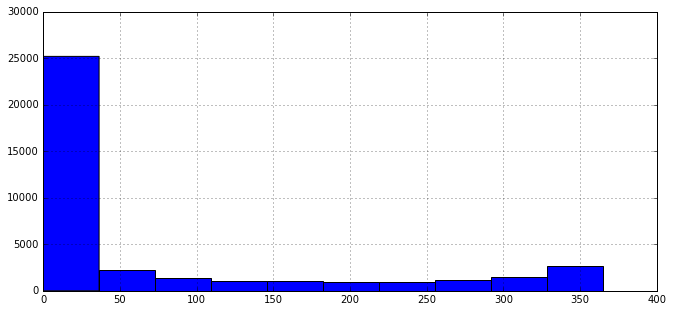

In [151]:
import matplotlib.pyplot as plt
%matplotlib inline
master_table.duration_int.hist(figsize=[11,5])

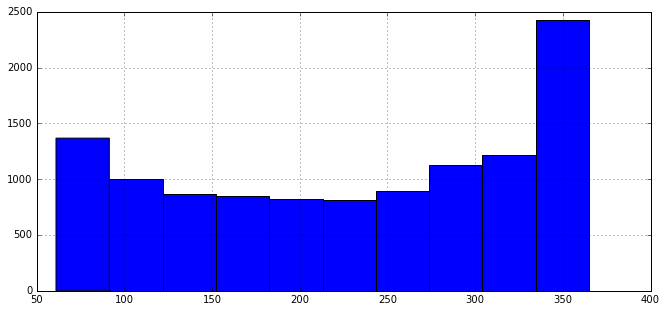

In [153]:
master_table[master_table['duration_int']>60].duration_int.hist(figsize=[11,5])

In [154]:
master_table[master_table['duration_int']>60].duration_int.hist(figsize=[11,5])

array(['2008'], dtype=object)

In [159]:
master_table[(master_table['duration_int']>60) & (master_table['duration_int']<360) ].count()

char            10201
 race           10201
 charclass      10201
 level          10201
min_date        10201
max_date        10201
min_year        10201
max_year        10201
duration        10201
duration_int    10201
dtype: int64

In [165]:
by_class = master_table.groupby(' charclass')[[' level']].count().reset_index()

In [174]:
by_class.sort_values(' level',ascending =False)

,charclass,level
9,Warrior,7686
2,Hunter,4976
6,Rogue,4794
3,Mage,4175
8,Warlock,4005
4,Paladin,3199
7,Shaman,3060
5,Priest,2752
1,Druid,1935
0,Death Knight,1749


In [175]:
by_race = master_table.groupby(' race')[[' level']].count().reset_index()

In [176]:
by_race.sort_values(' level',ascending =False)

,race,level
0,Blood Elf,12888
1,Orc,7229
3,Troll,6858
4,Undead,5980
2,Tauren,5376


In [177]:
by_race = master_table.groupby([' race',' charclass'])[[' level']].count().reset_index()

In [178]:
by_race.sort_values(' level',ascending =False)

,race,charclass,level
12,Orc,Warrior,3506
3,Blood Elf,Paladin,3199
2,Blood Elf,Mage,2218
6,Blood Elf,Warlock,2090
14,Tauren,Druid,1935
24,Troll,Warrior,1697
1,Blood Elf,Hunter,1652
17,Tauren,Warrior,1555
19,Troll,Hunter,1543
5,Blood Elf,Rogue,1479


In [185]:
x = wow.groupby(['char',' zone']).count().reset_index()

In [189]:
y = x[['char',' zone']].groupby('char').count().reset_index()

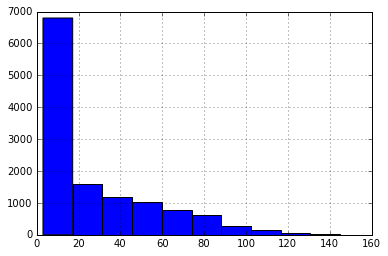

In [195]:
y[y[' zone']>2][' zone'].hist()